In [23]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 재시작

In [30]:
# 한글 폰트 사용을 위한 설정
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [5]:
!pip install pymysql > /dev/null

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving mysql.json to mysql.json


In [31]:
import json
with open(filename) as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [32]:
import db_module as dm

In [33]:
results = dm.get_monthly_data(config)
#results = get_monthly(config)
df = pd.DataFrame(results, columns=['월','매출','이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,매출,이익
월,,
01,45188600,3253710
02,41404100,3001540
03,41519000,3408780
04,34119900,2523220
05,44278300,3677470
06,43531600,3176820
07,43774800,3268250
08,39160600,3369180
09,53884900,4171670


In [34]:
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]

In [35]:
tdf

월,01,02,03,04,05,06,07,08,09,10,11,12,계
매출,45188600,41404100,41519000,34119900,44278300,43531600,43774800,39160600,53884900,28081500,44517600,50848000,510308900
이익,3253710,3001540,3408780,2523220,3677470,3176820,3268250,3369180,4171670,2277580,3968430,4350020,40446670


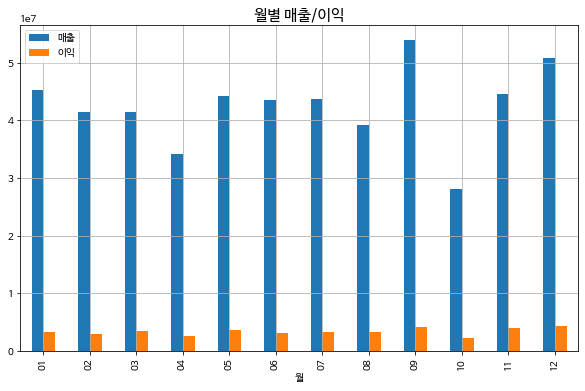

In [36]:
df.plot.bar(figsize=(10,6))
plt.title('월별 매출/이익', size=15)
plt.grid()
plt.show()

- 거래처별 매출 이익

In [143]:
def get_monthly(config):
    conn = pymysql.connect(**config)
    cur = conn.cursor()

    sql = """
        SELECT DATE_FORMAT(sdate, '%m') AS `month`, 
            SUM(revenue) AS revenue, SUM(profit) AS profit
            FROM sales_book
            GROUP BY `month`
            ORDER BY `month`;
    """
    cur.execute(sql)
    results = cur.fetchall()

    cur.close()
    conn.close()
    return results

In [145]:
results = get_monthly(config)
df = pd.DataFrame(results, columns=['거래처','매출','이익'])
df.set_index('거래처', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
tdf = df.T
tdf

거래처,01,02,03,04,05,06,07,08,09,10,11,12
매출,45188600,41404100,41519000,34119900,44278300,43531600,43774800,39160600,53884900,28081500,44517600,50848000
이익,3253710,3001540,3408780,2523220,3677470,3176820,3268250,3369180,4171670,2277580,3968430,4350020


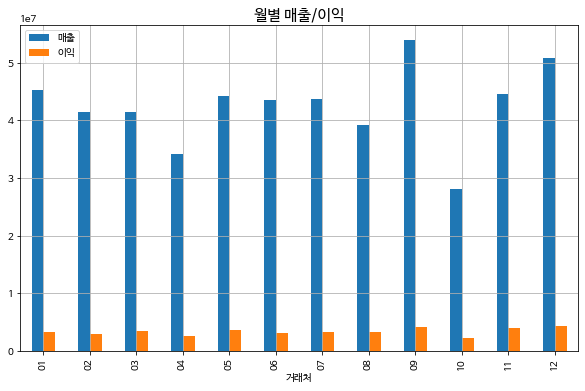

In [147]:
df.plot.bar(figsize=(10,6))
plt.title('월별 매출/이익', size=15)
plt.grid()
plt.show()

In [50]:
def company_product(config):
    conn = pymysql.connect(**config)
    cur = conn.cursor()

    sql = """
        SELECT scompany AS `company`, 
            pname, sum(sunit)
            FROM sales_book
            GROUP BY `company`, pname
            ORDER BY `company`;
    """
    cur.execute(sql)
    results = cur.fetchall()

    cur.close()
    conn.close()
    return results

In [ ]:
results = company_product(config)
df = pd.DataFrame(results, columns=['거래처','판매제품','수량'])
df.set_index('거래처', inplace=True)
df['수량'] = df.수량.astype(int)
df.reset_index(inplace = True)

In [148]:
df2 = df.groupby(['거래처', '판매제품']).sum()


KeyError: ignored

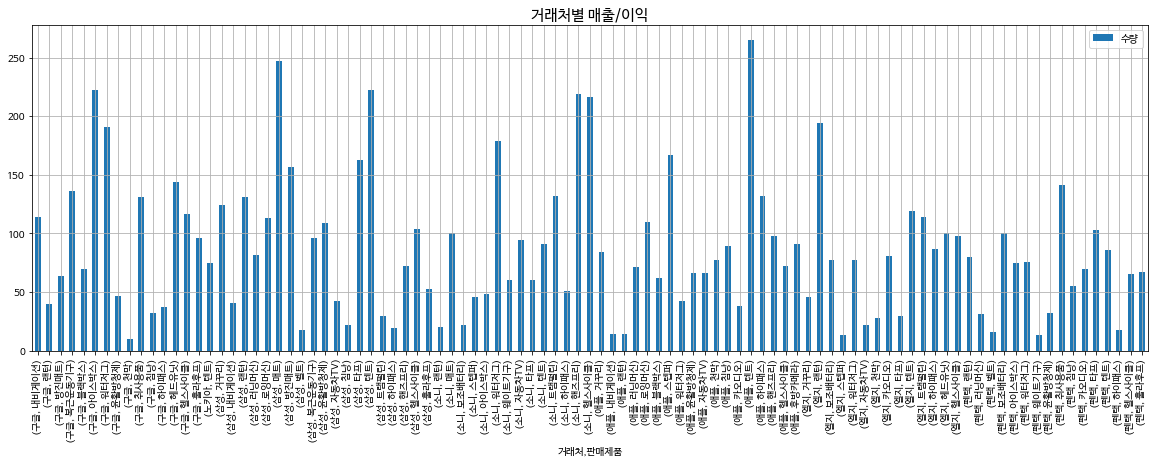

In [83]:
df2.plot.bar(figsize=(20,6))
plt.title('거래처별 매출/이익', size=15)
plt.grid()
plt.show()

- 제품별 판매수량/매출/이익

In [84]:
def product_unit(config):
    conn = pymysql.connect(**config)
    cur = conn.cursor()

    sql = """
        SELECT pname AS `product`, sum(sunit) AS unit,
		      SUM(revenue) AS revenue, SUM(profit) AS profit 
            FROM sales_book
            GROUP BY `product`
            ORDER BY `product`
    """
    cur.execute(sql)
    results = cur.fetchall()

    cur.close()
    conn.close()
    return results

In [133]:
results = product_unit(config)
df = pd.DataFrame(results, columns=['제품명','판매수량','매출', '이익'])
df.set_index('제품명', inplace=True)
df['판매수량'] = df.판매수량.astype(int)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)

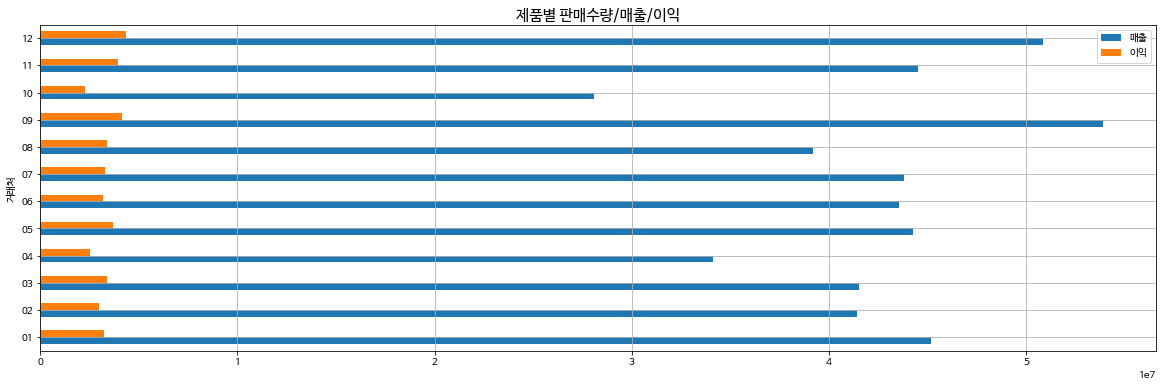

In [149]:
df.plot.barh(figsize=(20,6))
plt.title('제품별 판매수량/매출/이익', size=15)
plt.grid()
plt.show()

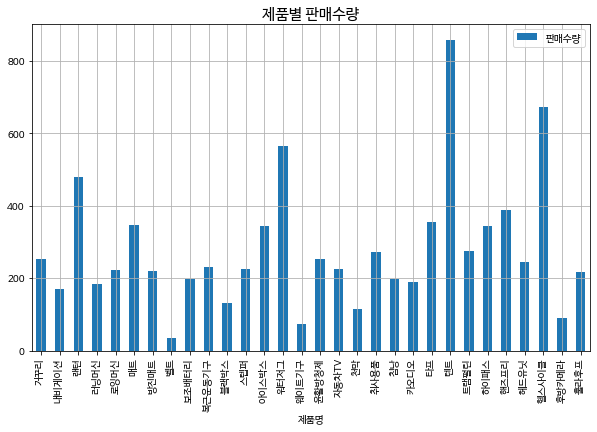

In [120]:
df[['판매수량']].plot.bar(figsize=(10,6))
plt.title('제품별 판매수량', size=15)
plt.grid()
plt.show()

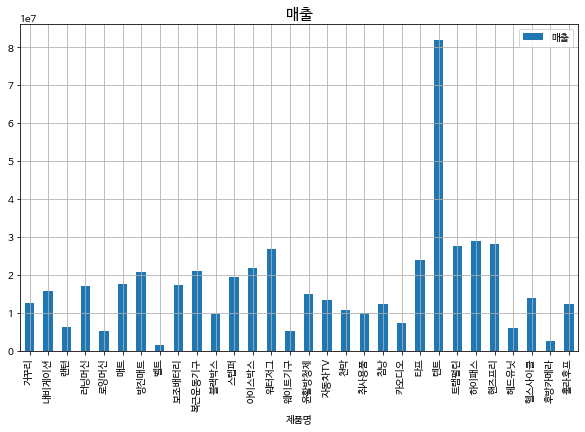

In [125]:
df[['매출']].plot.bar(figsize=(10,6))
plt.title('제품별 매출', size=15)
plt.grid()
plt.show()

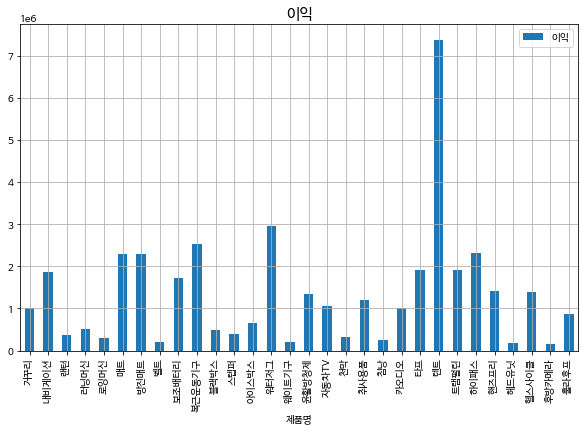

In [122]:
df[['이익']].plot.bar(figsize=(10,6))
plt.title('제품별 이익', size=15)
plt.grid()
plt.show()